In [1]:
#!pip install shap

In [24]:
import pandas as pd
#from datetime import timedelta
from pycaret.classification import *
import shap

In [25]:
df = pd.read_parquet('./data/final_clin_wo_cluster_d2d3.parquet')

In [12]:
#df_w_sepsis3 = df

In [26]:
df.columns.tolist()

['stay_id',
 'subject_id',
 'hadm_id',
 'first_careunit',
 'last_careunit',
 'admission_type',
 'admission_location',
 'insurance',
 'language',
 'marital_status',
 'race',
 'hospital_expire_flag',
 'gender',
 'anchor_age',
 'anchor_year',
 'anchor_year_group',
 'pao2fio2ratio_novent_avg_d1',
 'pao2fio2ratio_vent_avg_d1',
 'rate_epinephrine_avg_d1',
 'rate_norepinephrine_avg_d1',
 'rate_dopamine_avg_d1',
 'rate_dobutamine_avg_d1',
 'platelet_min_d1',
 'creatinine_max_d1',
 'bilirubin_max_d1',
 'respiration_d1',
 'coagulation_d1',
 'liver_d1',
 'cardiovascular_d1',
 'cns_d1',
 'renal_d1',
 'preiculos_d1',
 'preiculos_score_d1',
 'gcs_d1',
 'gcs_score_d1',
 'heartrate_d1',
 'heart_rate_score_d1',
 'meanbp_d1',
 'mbp_score_d1',
 'resprate_d1',
 'resp_rate_score_d1',
 'temp_d1',
 'temp_score_d1',
 'urineoutput_d1',
 'urineoutput_score_d1',
 'mechvent_d1',
 'mechvent_score_d1',
 'electivesurgery_d1',
 'electivesurgery_score_d1',
 'sepsis3']

In [27]:
df = df[(df.sepsis3 == 1)]

In [28]:
df.count()

stay_id                        15671
subject_id                     15671
hadm_id                        15671
first_careunit                 15671
last_careunit                  15671
admission_type                 15671
admission_location             15671
insurance                      15671
language                       15671
marital_status                 15671
race                           15671
hospital_expire_flag           15671
gender                         15671
anchor_age                     15671
anchor_year                    15671
anchor_year_group              15671
pao2fio2ratio_novent_avg_d1     3957
pao2fio2ratio_vent_avg_d1       7458
rate_epinephrine_avg_d1         1006
rate_norepinephrine_avg_d1      5038
rate_dopamine_avg_d1             539
rate_dobutamine_avg_d1           332
platelet_min_d1                15544
creatinine_max_d1              15584
bilirubin_max_d1                8901
respiration_d1                 10756
coagulation_d1                 15645
l

In [29]:
df.drop(['stay_id', 'subject_id', 'hadm_id','sepsis3'], axis=1, inplace=True)

In [30]:
# exp1 = setup(df, target = 'hospital_expire_flag', numeric_features=numerical_variables, categorical_features=categorical_variables, numeric_imputation='median', fix_imbalance=True, session_id=42)
exp2 = setup(df, target = 'hospital_expire_flag', numeric_imputation='median', fix_imbalance=True, session_id=42)

,Description,Value
0,session_id,42
1,Target,hospital_expire_flag
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15671, 46)"
5,Missing Values,True
6,Numeric Features,22
7,Categorical Features,23
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8105,0.8000,0.3192,0.6054,0.4174,0.3171,0.3405,0.2790
gbc,Gradient Boosting Classifier,0.8081,0.7912,0.2764,0.6098,0.3799,0.2851,0.3166,1.5360
rf,Random Forest Classifier,0.8043,0.7777,0.1968,0.6312,0.2996,0.2208,0.2720,0.4110
et,Extra Trees Classifier,0.8041,0.7686,0.2054,0.6227,0.3084,0.2268,0.2746,0.3860
xgboost,Extreme Gradient Boosting,0.7993,0.7751,0.3312,0.5487,0.4129,0.3007,0.3147,1.4790
ada,Ada Boost Classifier,0.7953,0.7624,0.3210,0.5347,0.4002,0.2861,0.3001,0.3620
dummy,Dummy Classifier,0.7869,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0420
dt,Decision Tree Classifier,0.7223,0.5970,0.3787,0.3580,0.3678,0.1902,0.1904,0.1010
ridge,Ridge Classifier,0.7166,0.0000,0.7078,0.4054,0.5154,0.3354,0.3615,0.0480
lda,Linear Discriminant Analysis,0.7166,0.7845,0.7078,0.4054,0.5154,0.3354,0.3615,0.1220


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [31]:
# Rank: 1st, AUC
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8131,0.8122,0.2747,0.6400,0.3844,0.2944,0.3311
1,0.8195,0.8119,0.3433,0.6400,0.4469,0.3506,0.3749
2,0.8113,0.7993,0.3120,0.6134,0.4136,0.3151,0.3407
3,0.8195,0.7953,0.3462,0.6429,0.4500,0.3535,0.3777
4,0.8040,0.7826,0.3248,0.5714,0.4142,0.3070,0.3247
5,0.7958,0.8060,0.2778,0.5417,0.3672,0.2603,0.2809
6,0.8140,0.8150,0.3504,0.6119,0.4457,0.3437,0.3630
7,0.8077,0.7911,0.3419,0.5839,0.4313,0.3249,0.3418
8,0.8004,0.8017,0.2906,0.5620,0.3831,0.2781,0.2997


In [10]:
#tuned_lgbm = tune_model(lgbm, optimize='AUC')

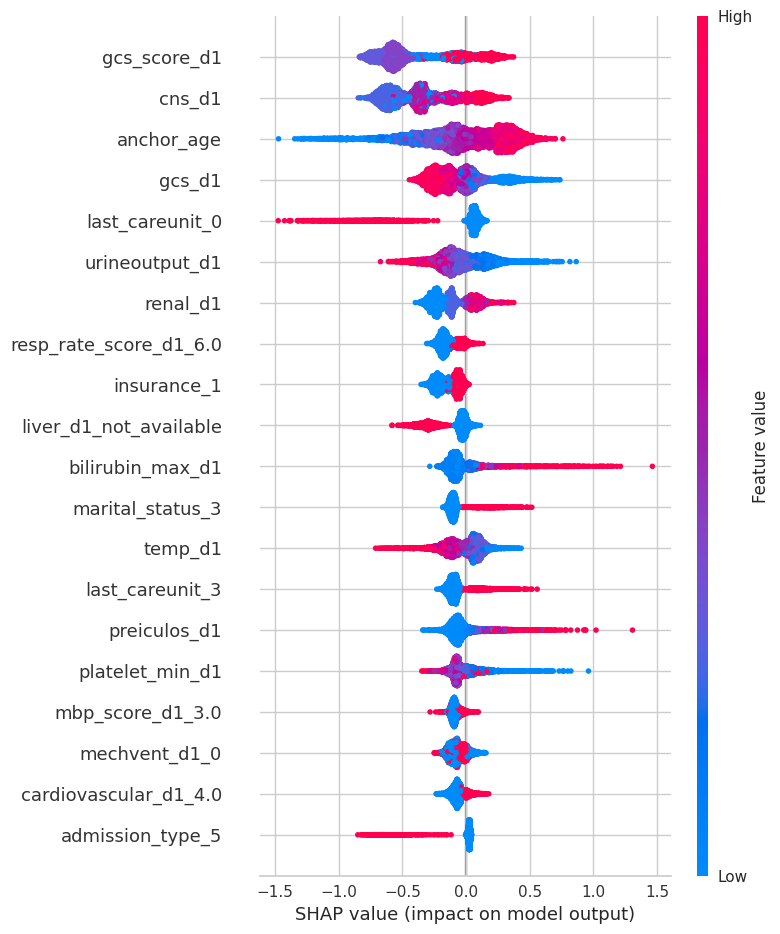

In [32]:
interpret_model(lgbm)

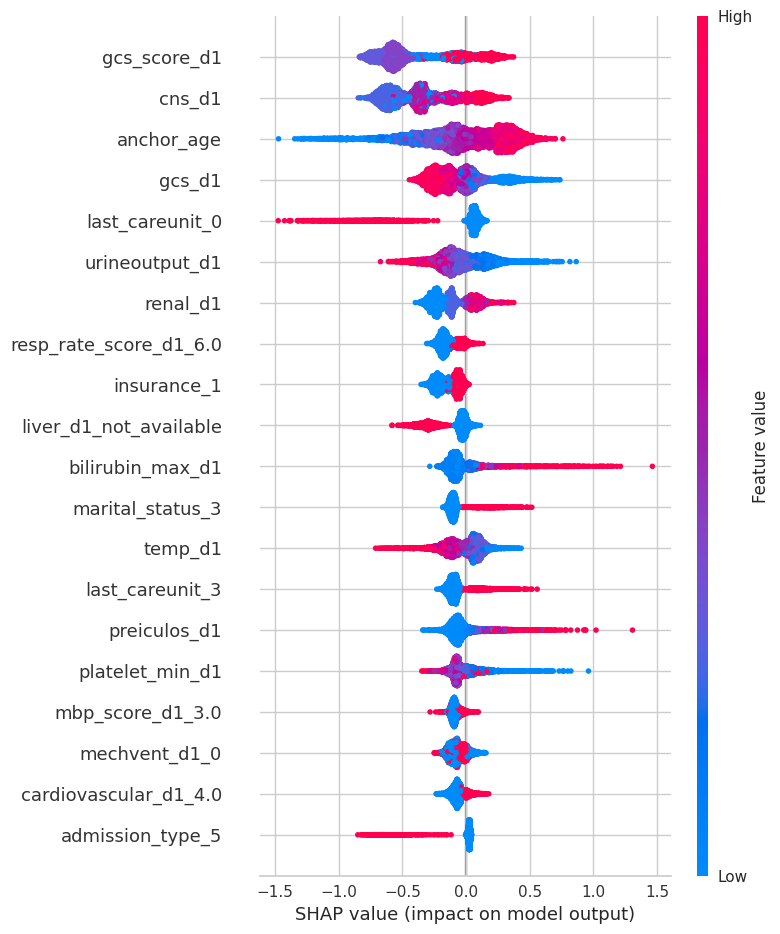

In [33]:
interpret_model(lgbm, plot='summary')

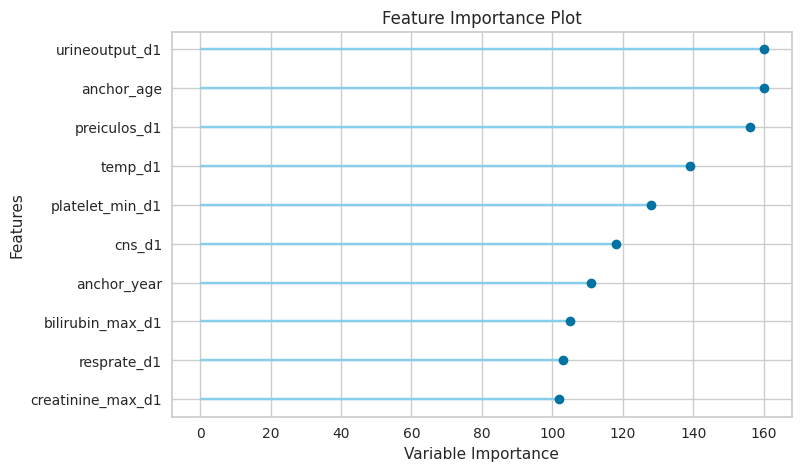

In [34]:
plot_model(lgbm, plot='feature')

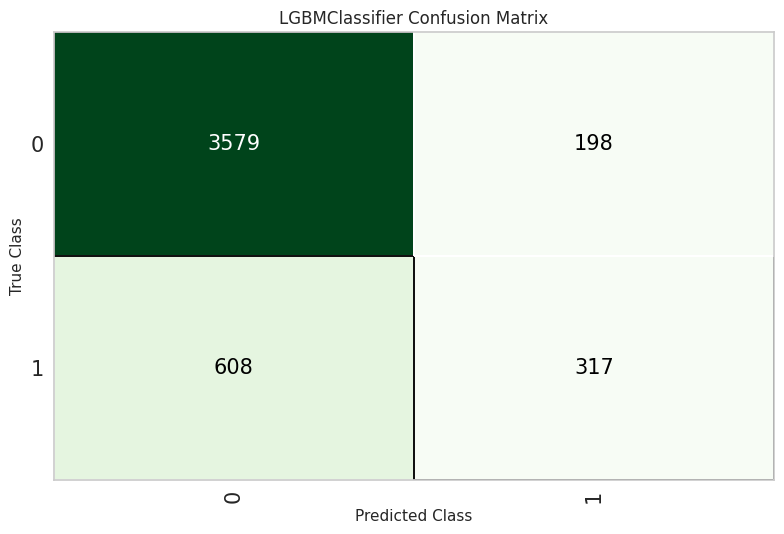

In [35]:
plot_model(lgbm, plot = 'confusion_matrix')

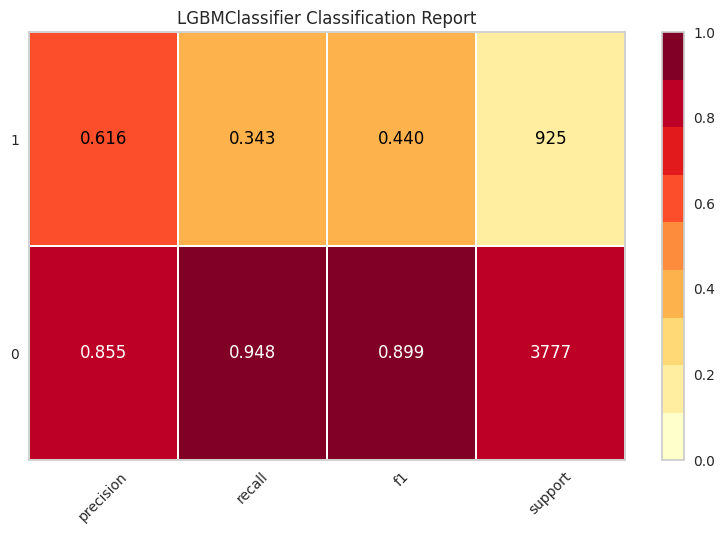

In [36]:
plot_model(lgbm, plot = 'class_report')

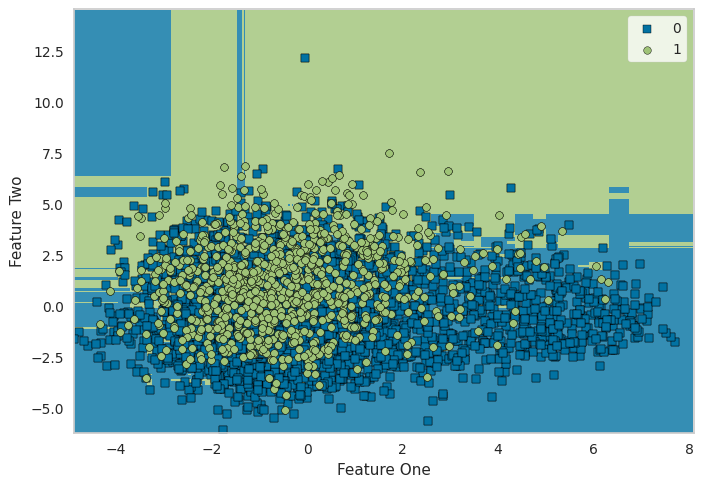

In [37]:
plot_model(lgbm, plot='boundary')

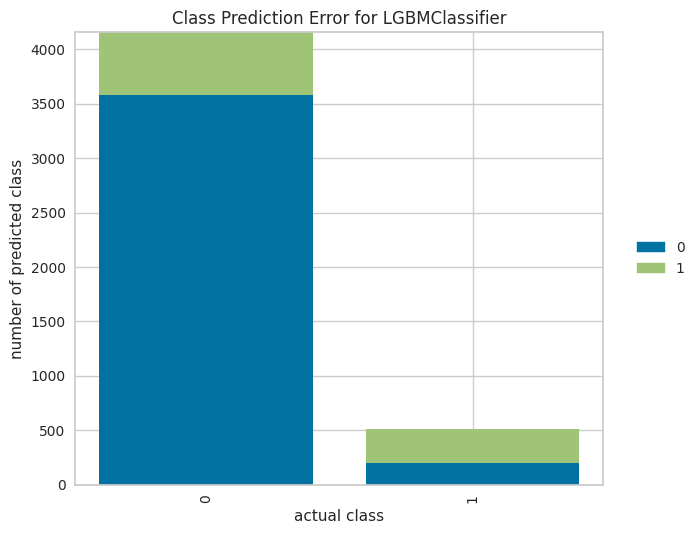

In [38]:
plot_model(lgbm, plot = 'error')

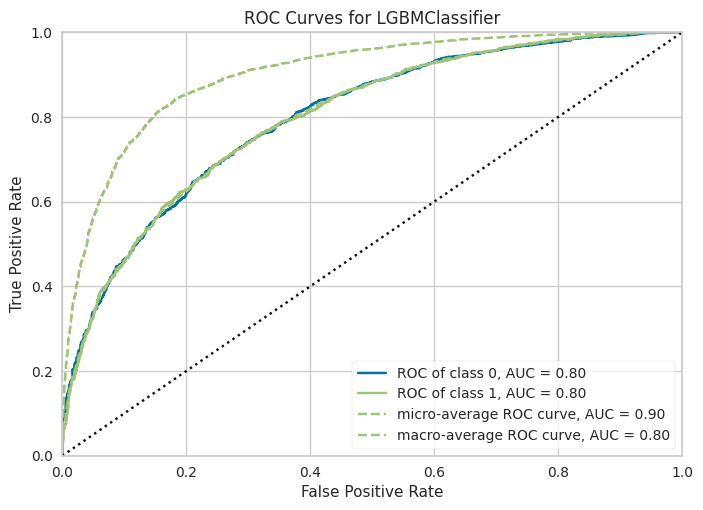

In [39]:
plot_model(lgbm, plot='auc')

In [40]:
evaluate_model(lgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [41]:
predict_model(lgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8286,0.7990,0.3427,0.6155,0.4403,0.3486,0.3695


,race,anchor_age,anchor_year,pao2fio2ratio_novent_avg_d1,pao2fio2ratio_vent_avg_d1,rate_epinephrine_avg_d1,rate_norepinephrine_avg_d1,rate_dopamine_avg_d1,rate_dobutamine_avg_d1,platelet_min_d1,...,urineoutput_score_d1_0.0,urineoutput_score_d1_1.0,urineoutput_score_d1_10.0,urineoutput_score_d1_5.0,urineoutput_score_d1_8.0,urineoutput_score_d1_not_available,mechvent_d1_0,hospital_expire_flag,Label,Score
0,22.0,66.0,2180.0,220.000000,244.375000,0.030128,0.111938,6.362787,3.973153,211.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.8826
1,22.0,35.0,2117.0,220.000000,244.375000,0.030128,0.107191,6.362787,3.973153,63.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.6081
2,28.0,88.0,2122.0,220.000000,244.375000,0.030128,0.107191,6.362787,3.973153,185.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9136
3,28.0,57.0,2142.0,295.000000,244.375000,0.030128,0.140934,6.362787,3.973153,63.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.8554
4,7.0,66.0,2195.0,220.000000,148.000000,0.030128,0.192598,6.362787,3.973153,105.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.5890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,27.0,37.0,2114.0,220.000000,496.666656,0.030128,0.107191,6.362787,3.973153,104.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9808
4698,28.0,68.0,2126.0,220.000000,25.000000,0.030128,0.107191,6.362787,3.973153,114.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8770
4699,7.0,59.0,2117.0,408.333344,244.375000,0.030128,0.107191,6.362787,3.973153,86.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0.9548
4700,5.0,77.0,2173.0,220.000000,244.375000,0.030128,0.107191,6.362787,3.973153,192.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0.7952


In [42]:
final_lgbm = finalize_model(lgbm)

In [43]:
print(lgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [44]:
save_model(lgbm, "models/lgbm_sepsis_wo_cluster_wo_d23")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='hospital_expire_flag',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_sample

In [ ]:
# new_prediction = predict_model(Final Model, data=data_unseen)
# new_prediction.head()

In [ ]:
# saved_final_model = load_model('Final Model')

In [ ]:
import matplotlib.pyplot as plt
imp = sorted(list(zip(tuned_cat.feature_names_, et.feature_importances_)), key= lambda x:x[1], reverse=True)
names = [x[0] for x in imp]
values = [x[1] for x in imp]
plt.barh(names[:5], values[:5])

In [ ]:
imp = sorted(list(zip(tuned_cat.feature_names_, et.feature_importances_)), key= lambda x:x[1], reverse=True)
print("\n".join([": ".join([x[0], str(round(x[1], 4))]) for x in imp]))

In [ ]:
file_path
with open(file_path, 'w') as f: